# The Gradient Boosting Algorithm

## Given data

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# Sample X from a normal distribtion
n = 10
location = 10
sd = 3

X = np.random.normal(loc=location, scale=sd, size=n).reshape(-1,1)
X

array([[14.61009631],
       [11.9605492 ],
       [10.30702071],
       [11.8321904 ],
       [10.70061003],
       [13.17348455],
       [14.43113321],
       [11.37602219],
       [12.89311611],
       [ 7.12401555]])

In [43]:
# Generate target variabel
intercept = 2
beta = 5

y = intercept + beta*X + np.random.normal(size=n).reshape(-1,1)
y

array([[75.50313227],
       [62.29991609],
       [53.59827472],
       [60.38617759],
       [56.32751464],
       [69.27044126],
       [74.22955298],
       [58.93180087],
       [65.50666457],
       [38.5714144 ]])

## Plot

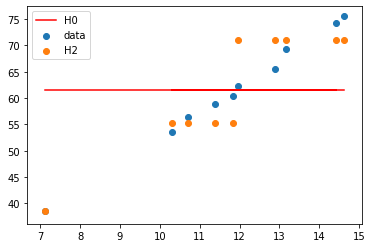

In [93]:
plt.scatter(X, y, label="data")
plt.plot(X, H0, label="H0", c="red")
#plt.scatter(X, H1, label="H1")
plt.scatter(X, H2, label="H2")
plt.legend(loc="best")
plt.show();

## Gradient boosting

In [75]:
H0 = np.repeat(np.mean(y), X.shape[0]).reshape(-1,1)  # initialize ensemble

In [76]:
# calc residuals
e0 = y-H0

print("MSE of H0 is {}".format( np.mean(e0**2 )))

MSE of H0 is 105.79362978567205


### Creating base model 1

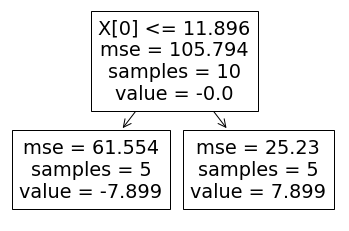

In [79]:
# Train model to (X, e0)
from sklearn.tree import DecisionTreeRegressor, plot_tree

tree = DecisionTreeRegressor(max_leaf_nodes=2)  # shallow tree, i.e., stump
tree.fit(X, e0)
plot_tree(tree);

In [83]:
# Calculate base model forecast 
h1 = tree.predict(X).reshape(-1,1)
h1

array([[ 7.8994525],
       [ 7.8994525],
       [-7.8994525],
       [-7.8994525],
       [-7.8994525],
       [ 7.8994525],
       [ 7.8994525],
       [-7.8994525],
       [ 7.8994525],
       [-7.8994525]])

In [84]:
H1 = H0 + h1  # ensemble in step 2

e1 = y - H1  # residuals after step 2
print("MSE of H1 is {}".format( np.mean(e1**2 )))

MSE of H1 is 43.39228005402718


### Add second base model

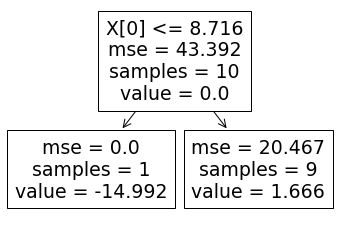

In [87]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=2)
tree2.fit(X, e1)
plot_tree(tree2);

In [91]:
# Update our ensemble
H2 = H1 + tree2.predict(X).reshape(-1, 1)
e2 = y - H2  # residual and target for the next iteration
print("MSE of H2 is {}".format( np.mean(e2**2 )))

MSE of H2 is 18.420198771818285
